PyGSLIB
========

Declustering
---------------

This is how declustering works




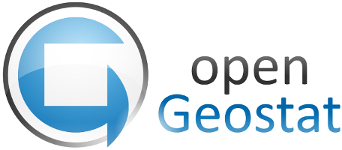

In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib  
import numpy as np

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat')  

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print (' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5))

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


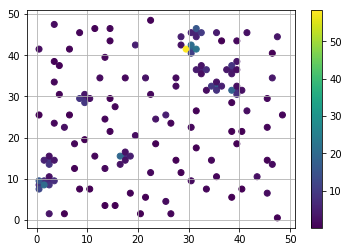

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## Testing declust

This parameters ar selected bu default... as in the file declus.par included in the gslib 77 distribution

<pre><code>
                  Parameters for DECLUS
                  *********************

START OF PARAMETERS:
../data/cluster.dat         \file with data
1   2   0   3               \  columns for X, Y, Z, and variable
-1.0e21     1.0e21          \  trimming limits
declus.sum                  \file for summary output
declus.out                  \file for output with data & weights
1.0   1.0                   \Y and Z cell anisotropy (Ysize=size*Yanis)
0                           \0=look for minimum declustered mean (1=max)
24  1.0  25.0               \number of cell sizes, min size, max size
5                           \number of origin offsets

</code></pre>

 > Note: The trimming limits are not implemented in the Fortran module. you may filter the data before using this function



In [5]:
#Check the data is ok
a=mydata['Primary'].isnull()
print ("Undefined values:", len(a[a==True]))
print ("Minimum value   :", mydata['Primary'].min())
print ("Maximum value   :", mydata['Primary'].max())

Undefined values: 0
Minimum value   : 0.06
Maximum value   : 58.32


In [6]:
parameters_declus = { 
        'x'      :  mydata['Xlocation'],  # data x coordinates, array('f') with bounds (na), na is number of data points
        'y'      :  mydata['Ylocation'],  # data y coordinates, array('f') with bounds (na)
        'z'      :  mydata['Zlocation'],  # data z coordinates, array('f') with bounds (na)
        'vr'     :  mydata['Primary'],    # variable, array('f') with bounds (na)
        'anisy'  :  1.,                   # Y cell anisotropy (Ysize=size*Yanis), 'f' 
        'anisz'  :  1.,                   # Z cell anisotropy (Zsize=size*Zanis), 'f' 
        'minmax' :  0,                    # 0=look for minimum declustered mean (1=max), 'i' 
        'ncell'  :  24,                   # number of cell sizes, 'i' 
        'cmin'   :  1.,                   # minimum cell sizes, 'i' 
        'cmax'   :  25.,                   # maximum cell sizes, 'i'. Will be update to cmin if ncell == 1
        'noff'   :  5,                    # number of origin offsets, 'i'. This is to avoid local minima/maxima
        'maxcel' :  100000}               # maximum number of cells, 'i'. This is to avoid large calculations, if MAXCEL<1 this check will be ignored


wtopt,vrop,wtmin,wtmax,error,xinc,yinc,zinc,rxcs,rycs,rzcs,rvrcr = pygslib.gslib.declus(parameters_declus)


In [7]:
# to know what the output means print the help
help(pygslib.gslib.declus)

Help on function declus in module pygslib.gslib:

declus(parameters)
    Decluster data and run declustering test with different 
    declustering cell sizes
    
    
    Parameters
    ----------
        parameters  :  dict
            dictionary with calculation parameters
    
    The dictionary with parameters may be as follows::
    
            parameters = {
                   # database  
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'vr'     :  mydata.vr,    # variable, array('f') with bounds (na)
                   # cell size
                    'anisy'  :  5.,           # Y cell anisotropy (Ysize=size*Yanis), 'f' 
                    'anisz'  :  3.,           # Z cell anisotropy (Zsize=s

Plotting results
-----------------------

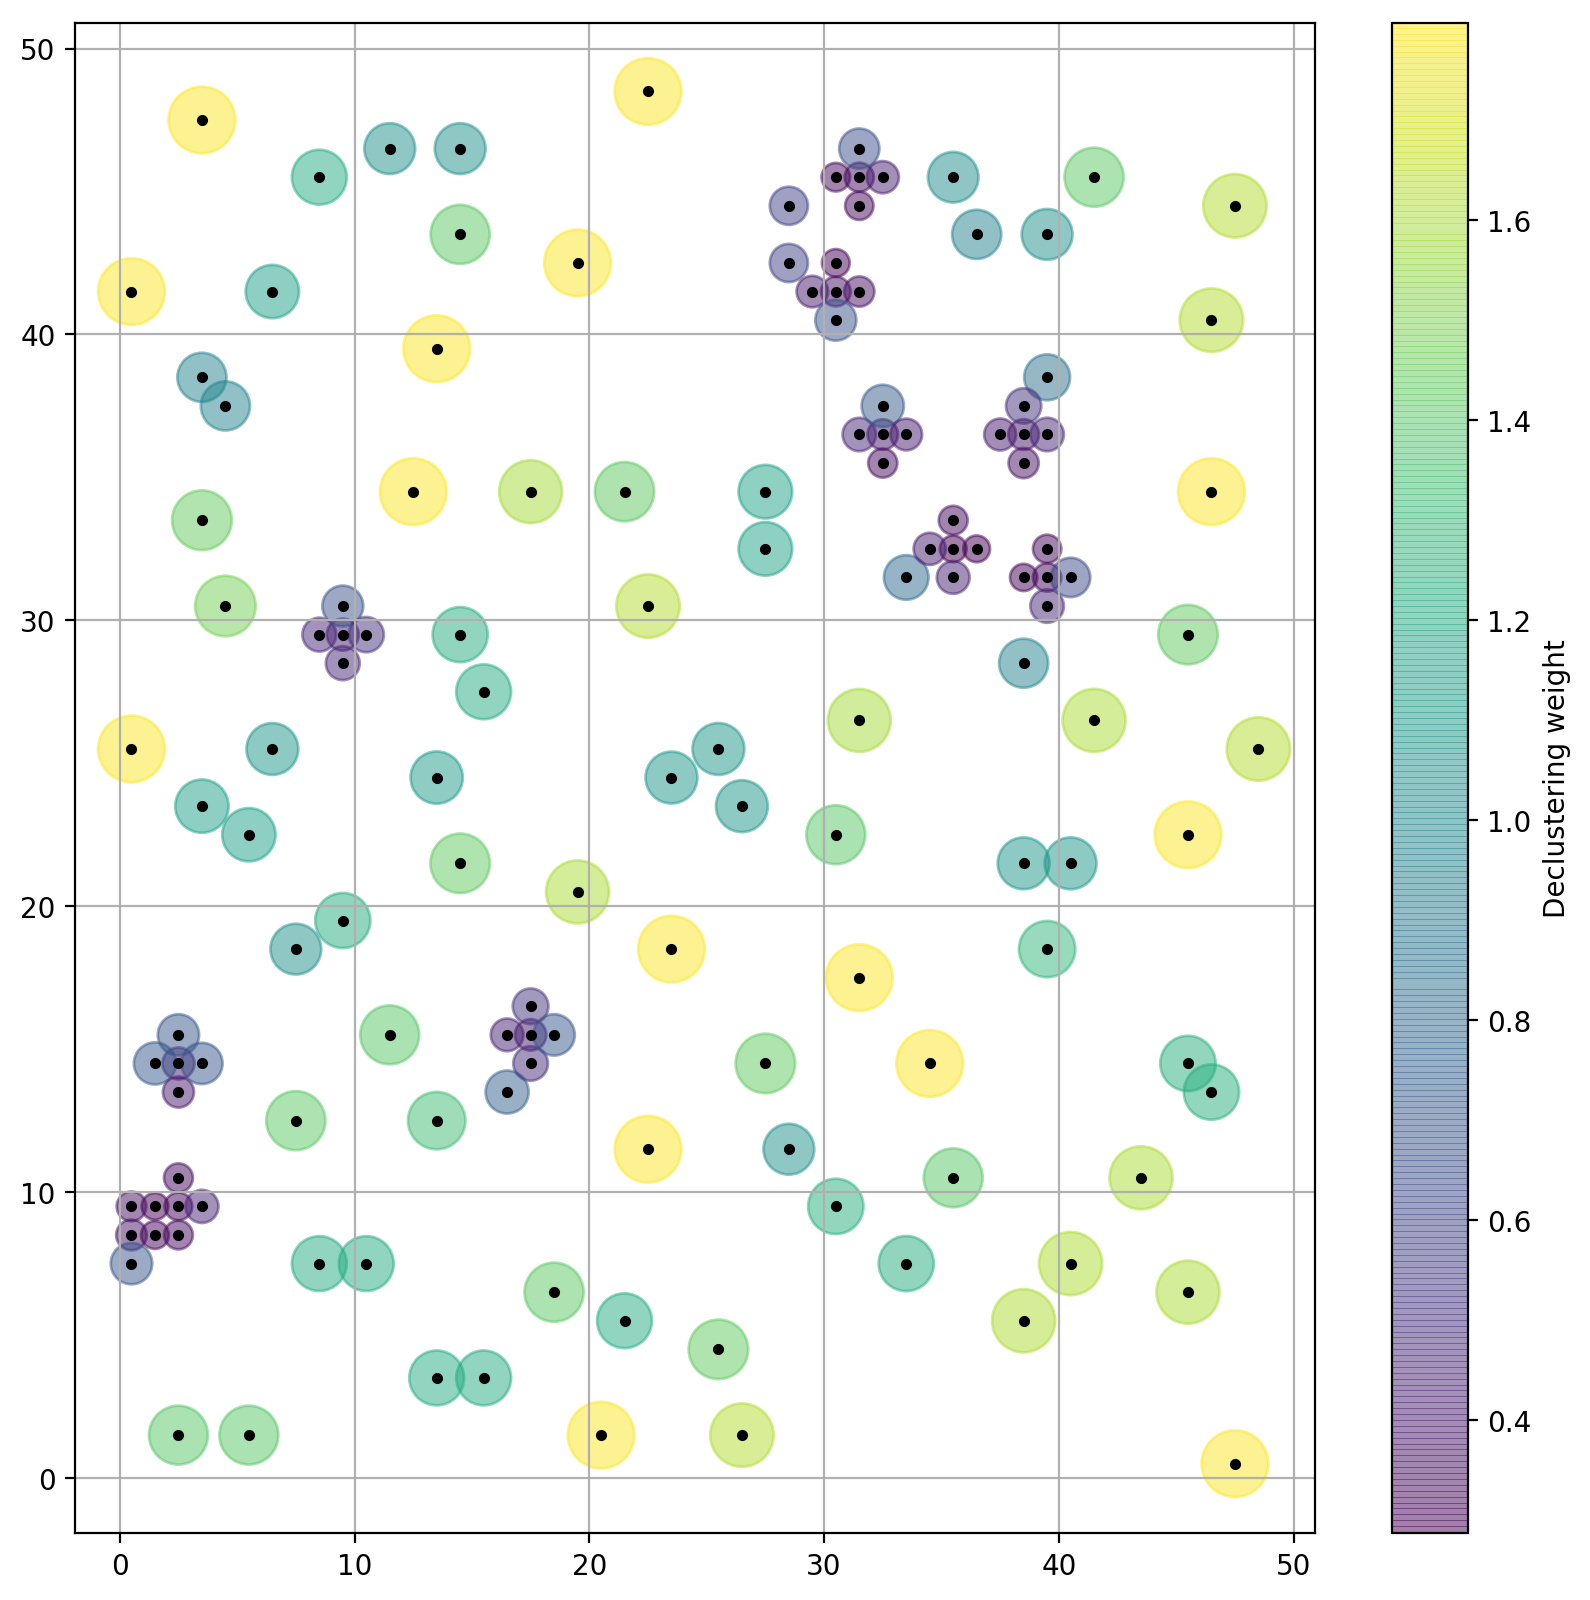

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')

#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=wtopt, s=wtopt*320, alpha=0.5)
plt.plot(mydata['Xlocation'],mydata['Ylocation'], '.', color='k')
l=plt.colorbar()
l.set_label('Declustering weight')
plt.grid(True)
plt.show()



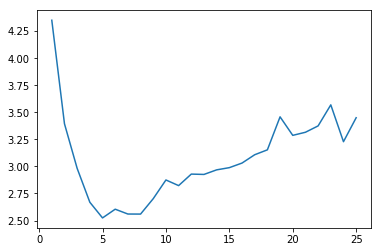

In [9]:
#The declustering size
plt.plot (rxcs, rvrcr)

In [10]:
rvrcr

array([4.35042857, 3.39378896, 2.98162556, 2.66866204, 2.52389033,
       2.60441035, 2.55979098, 2.55933201, 2.70186247, 2.87452469,
       2.8224313 , 2.92879786, 2.92567333, 2.96800434, 2.98835836,
       3.03075265, 3.10770573, 3.15293722, 3.45777246, 3.28682611,
       3.31529761, 3.37412019, 3.56855904, 3.22819747, 3.44961973])

In [11]:
print ('=========================================')
print ('declustered mean     :',  vrop            )
print ('weight minimum       :',  wtmin           )
print ('weight maximum       :',  wtmax           )
print ('runtime error        :',  error           )
print ('cell size increments :',  xinc,yinc,zinc  )
print ('sum of weight        :',  np.sum(wtopt)   )
print ('n data               :',  len(wtopt)      )
print ('=========================================')


declustered mean     : 2.5238903349456234
weight minimum       : 0.28778988201283306
weight maximum       : 1.797445849129856
runtime error        : 0
cell size increments : 1.0 1.0 1.0
sum of weight        : 140.00000000000006
n data               : 140


# Running only one cell size

From the plot above the optimum are 5x5x5 cells

In [12]:
parameters_declus = { 
        'x'      :  mydata['Xlocation'],  # data x coordinates, array('f') with bounds (na), na is number of data points
        'y'      :  mydata['Ylocation'],  # data y coordinates, array('f') with bounds (na)
        'z'      :  mydata['Zlocation'],  # data z coordinates, array('f') with bounds (na)
        'vr'     :  mydata['Primary'],    # variable, array('f') with bounds (na)
        'anisy'  :  1.,                   # Y cell anisotropy (Ysize=size*Yanis), 'f' 
        'anisz'  :  1.,                   # Z cell anisotropy (Zsize=size*Zanis), 'f' 
        'minmax' :  0,                    # 0=look for minimum declustered mean (1=max), 'i' 
        'ncell'  :  1,                   # number of cell sizes, 'i' 
        'cmin'   :  5.,                   # minimum cell sizes, 'i' 
        'cmax'   :  5.,                   # maximum cell sizes, 'i'. Will be update to cmin if ncell == 1
        'noff'   :  5,                    # number of origin offsets, 'i'. This is to avoid local minima/maxima
        'maxcel' :  100000}               # maximum number of cells, 'i'. This is to avoid large calculations, if MAXCEL<1 this check will be ignored


wtopt,vrop,wtmin,wtmax,error,xinc,yinc,zinc,rxcs,rycs,rzcs,rvrcr = pygslib.gslib.declus(parameters_declus)


In [12]:
print ('=========================================')
print ('declustered mean     :',  vrop            )
print ('weight minimum       :',  wtmin           )
print ('weight maximum       :',  wtmax           )
print ('runtime error        :',  error           )
print ('cell size increments :',  xinc,yinc,zinc  )
print ('sum of weight        :',  np.sum(wtopt)   )      
print ('n data               :',  len(wtopt)      )
print ('=========================================')

declustered mean     : 2.5238903349456234
weight minimum       : 0.28778988201283306
weight maximum       : 1.797445849129856
runtime error        : 0
cell size increments : 1.0 1.0 1.0
sum of weight        : 140.00000000000006
n data               : 140
